In [57]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [58]:
taxi=pd.read_csv("E:/Jupyter NB/TaxiFare.csv")

In [59]:
taxi.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [60]:
taxi.shape

(50000, 8)

In [61]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [62]:
taxi.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [63]:
taxi.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [64]:
taxi.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [65]:
taxi.unique_id.value_counts()

26:00.0    457
33:00.0    439
11:00.0    436
32:00.0    429
20:00.0    424
          ... 
56:16.0      1
40:52.0      1
53:10.0      1
15:21.0      1
53:22.0      1
Name: unique_id, Length: 3597, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8b7b5b730>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8b7b5be50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8b7b5b3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8b7b665b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d8b7b66940>],
 'means': []}

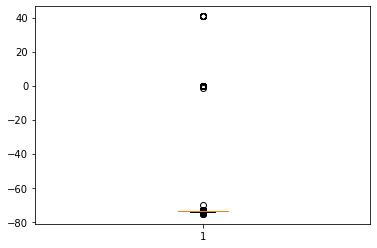

In [66]:
plt.boxplot(taxi.longitude_of_pickup)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8b7bbfaf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8b7bcd250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8b7bbf760>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8b7bcd970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d8b7bcdd00>],
 'means': []}

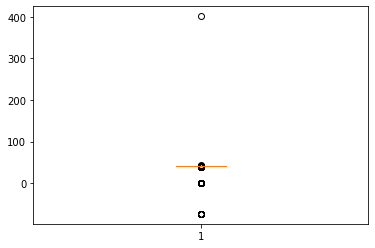

In [67]:
plt.boxplot(taxi.latitude_of_pickup)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8e96f0460>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8e96f0b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8e96f00d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8e96fd2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d8e96fd670>],
 'means': []}

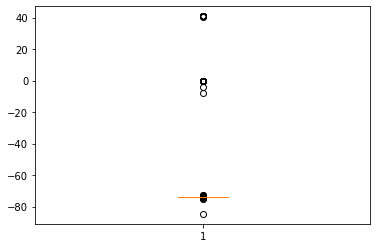

In [68]:
plt.boxplot(taxi.longitude_of_dropoff)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8e9757850>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8e9757f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8e97574c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8e97636d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d8e9763a60>],
 'means': []}

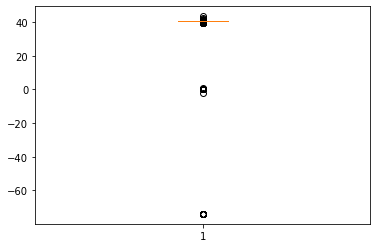

In [69]:
plt.boxplot(taxi.latitude_of_dropoff)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8e97c3430>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8e97c3b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8e97c30a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8e97d02b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d8e97d0640>],
 'means': []}

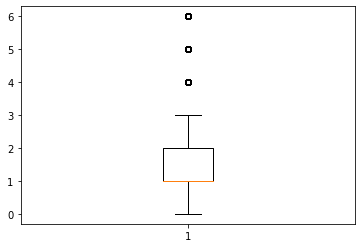

In [70]:
plt.boxplot(taxi.no_of_passenger)

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude_of_pickup', ylabel='amount'>

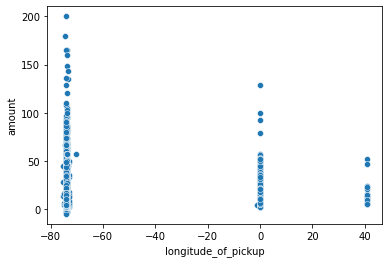

In [71]:
sns.scatterplot(taxi.longitude_of_pickup,taxi.amount)

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude_of_pickup', ylabel='amount'>

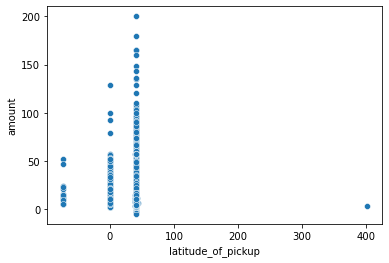

In [72]:
sns.scatterplot(taxi.latitude_of_pickup,taxi.amount)

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude_of_dropoff', ylabel='amount'>

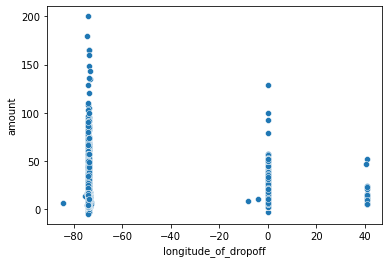

In [73]:
sns.scatterplot(taxi.longitude_of_dropoff,taxi.amount)

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude_of_dropoff', ylabel='amount'>

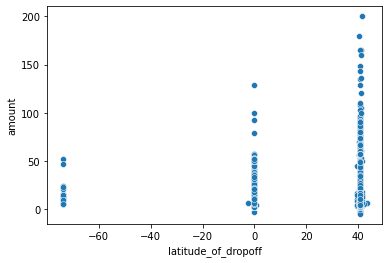

In [74]:
sns.scatterplot(taxi.latitude_of_dropoff,taxi.amount)

In [75]:
y=taxi.amount

In [76]:
X=taxi.drop(['unique_id','amount','date_time_of_pickup'],axis=1)

In [77]:
x=pd.get_dummies(X)

In [78]:
x.shape

(50000, 5)

In [79]:
scale=MinMaxScaler().fit(x)

In [80]:
scaler_final=scale.transform(x)

In [81]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)

In [82]:
model=RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(train_x, train_y)

RandomForestRegressor(random_state=0)

In [83]:
model.score(train_x,train_y)

0.9419346615318804

In [84]:
model.score(test_x,test_y)

0.7397099780424867